# Método de Monte Carlo Aplicado ao Modelo de Ising em 2 dimensões

## Resumo

Neste trabalho buscamos verificar a acurácia do *método de Monte Carlo* em encontrar aproximações para soluções da *energia, magnetização, capacidade térmica* e *susceptibilidade magnética* do *modelo de Ising* $2D$, e posteriormente comparar com as soluções exatas obtidas por Onsager$^{[2]}$. Após análises observou-se que o método numérico adotado de fato gera boas aproximações para as quantidades de interesse, principalmente quando temos um número suficientemente grande de configurações possíveis para o nosso sistema.

## (1) Introdução

Em *Mecânica Estatística* estamos interessados em calcular as propriedades termodinâmicas que possam ser de interesse via médias do tipo
\begin{align}
    \left<A\right> = \dfrac{\sum_c A(c)\exp{(-\beta \mathcal{H}(c))}}{\sum_c \exp{(-\beta \mathcal{H}(c))}},
\end{align}
onde a soma é feita sobre todas as configurações microscópicas de um sistema dado pelo hamiltoniano $\mathcal{H}$.
<br>
No trabalho em questão vamos tomar como base o \textit{modelo de Ising 2D} e estudar o comportamento das soluções numéricas e comparar com a solução analítica obtida por Onsager$^{[2]}$. Tomamos esse modelo pois é o primeiro modelo magnético "simples" que apresenta \textit{transição de fase} para o ferromagnetismo, que pode ser observada devido ao comportamento da *magnetização espontânea*, que veremos mais adiante, próxima de uma temperatura crítica.
<br>
Nosso foco será em calcular as quantidades físicas como *energia*, *susceptibilidade magnética*, *magnetização* e *capacidade térmica* no contexto do Ensemble Canônico.
<br>
Para tal, precisamos determinar o número de configurações possíveis para o nosso sistema. Porém, se o número de microestados acessíveis ao sistema é muito grande fica então inviável realizar a soma dada pela equação (1), de modo que precisamos tomar a nossa média sobre o número de configurações de equilíbrio representativas do sistema, $N$, devidamente selecionadas, dadas por
\begin{align}
    \left<A\right> = \dfrac{1}{N}\sum_{i=1}^N A_i,
\end{align}
Vamos calcular as médias das propriedades de interesse citadas acima por meio da soma representada na equação (2), via *Método de Monte Carlo*.

## (2) Método de Monte Carlo aplicado ao modelo de Ising $2D$

### (2.1) Validade do método de Monte Carlo em Mecânica Estatística

O método de Monte Carlo consiste em tomarmos uma sequência de configurações de modo que a $n$-ésima configuração do sistema dependa somente da $n-1$-ésima configuração. Algumas configurações iniciais podem ser geradas longe do equilíbrio, mas à medida que o tempo passa geramos muitas configurações típicas de equilíbrio que podem, então, ser utilizadas para realizar a média aritmética da equação $(2)$. 
<br>
O método de Monte Carlo é validado a partir da \textit{equação mestra}$^{[1]}$, que governa a evolução temporal da probabilidade de ocorrência dos estados microscópicos de um sistema, que é dada por
\begin{align}
    \dfrac{\partial}{\partial t}P(y,t) = \sum_{y'}\left(\omega(y'\to y)P(y',t) - \omega(y\to y')P(y,t)\right),
\end{align}
onde temos que $P(y,t)$ representa a probabilidade de encontrar um sistema no estado microscópico $y$, num determinado instante de tempo $t$, e $\omega(y_1\to y_2)$ representa a \textit{probabilidade de transição} por unidade de tempo de que o sistema mude do estado $y_1$ para o estado $y_2$.
<br>
No equilíbrio, ie, depois de percorrermos um número suficientemente grande de elementos da sequência gerada, as probabilidades devem tender para
\begin{align}
    P_0(y) = \dfrac{1}{Z}\exp{(-\beta \mathcal{H}(y))},
\end{align}
onde $Z$ é função de partição canônica no contexto do Ensemble Canônico (isto é, para um sistema em contato com um reservatório térmico). Naturalmente, uma condição suficiente para o equilíbrio é dada pela *equação do balanço detalhado*$^{[1]}$,
\begin{align}
    P_0(y)\omega(y\to y') = P_0(y')\omega(y'\to y).
\end{align}
Logo, as probabilidades de transição devem ser escolhidas de modo que 
\begin{align}
    \dfrac{\omega(y\to y')}{\omega(y'\to y)} = \exp{(-\beta \Delta\mathcal{H})},
\end{align}
onde $\Delta\mathcal{H}$ é diferença de energia entre as configurações $y$ e $y'$.
<br>
Note que a equação acima não especifica de forma unívoca as probabilidades de transição, de modo que duas escolhas frequentes em simulações de Monte Carlo são dadas pelo
- *algoritmo de Glauber*,
\begin{align}
    \omega(y\to y') = \dfrac{1}{2\tau}\left(1-\tanh\left(\dfrac{1}{2}\beta\Delta\mathcal{H}\right)\right),
\end{align}
    ou pelo
- *algoritmo de Metropolis*,
\begin{align}
    \omega(y\to y') =
        \begin{cases}
            \dfrac{1}{\tau}\exp{(-\beta\Delta\mathcal{H})}, \ &\Delta\mathcal{H} > 0, \\
            1/\tau, &\Delta\mathcal{H} < 0,
        \end{cases}
\end{align}
    onde podemos interpretar $\tau$ como uma "jogada de Monte Carlo" e tomar neste caso $\tau =1$.

Vamos usar o algoritmo de Metropolis para obter os resultados numéricos de interesse.

### (2.2) Método de Monte Carlo via Algoritmo de Metropolis

De modo geral, no método de Monte Carlo o algoritmo de Metropolis é dado seguindo os seguintes passos$^{[2]}$:

1. Escolhemos uma configuração inicial para os $N$ spins. (Por exemplo, podemos escolher todos os spins como sendo $+1$.)
2. Escolhemos um spin de modo aleatório.
3. Calculamos sua variação de energia, $\Delta E$, devido a sua mudança de sinal ($\pm 1$).
4. Se $\Delta E < 0$, aceitamos a mudança de energia. Se $r < e^{-\Delta E/k_B T}$, onde $r$ é um número uniforme entre $0$ e $1$, a mudança de energia também é aceita, já que nessa situação estaremos nos aproximando do equilíbrio. Caso contrário, a mudança é rejeitada e mantemos o microestado original.
5. Repetimos o passo $2$ e $3$.
6. Acumulamos dados para as várias médias termodinâmicas assim que o sistema estiver em equilíbrio.

Do algoritmo acima temos que uma tentativa de Monte Carlo por spin (mcs) é equivalente a $N$ tentativas de mudança de sinal para o spin.

### (2.3) Energia, Magnetização, Capacidade Térmica e Susceptibilidade Magnética no modelo de Ising $2D$

Estamos interessados em trabalhar com o \textit{modelo de Ising bidimensional} numa rede quadrada ($L\times L$). Como sabemos, a energia no modelo de Ising é dada por$^{[2]}$
\begin{align}
    E = -J \sum_{\alpha,\gamma=v.p.(\alpha)}^N s_\alpha s_\gamma - B\sum_{\alpha=1}^N s_\alpha,
\end{align}
onde $s_\alpha, s_\gamma=\pm 1$, $J$ é dita termo de "exchange" e a nossa soma dupla é feita sobre os vizinhos mais próximos (v.p.) de cada spin na rede.
<br>
Para o nosso estudo tomamos o campo magnético externo $B=0$, de modo que nossa energia será
\begin{align}
    E = -J \sum_{\alpha,\gamma=v.p.(\alpha)}^N s_\alpha s_\gamma.
\end{align}
Note ainda que cada spin tem duas componentes, já que estamos considerando o caso bidimensional. Deste modo, temos que $s_\alpha = s_{ij}$, onde $(i,j)$ são a posição do spin na nossa rede quadrada.
<br>
Por simplicidade, vamos trabalhar com unidades adimensionais no nosso modelo, isto é, vamos medir nossa energia em unidades de $J$ e nossa temperatura em unidades de $J/k_B$. (Por exemplo, se $T=2$ então temos de fato $T = 2J/k_B$.)
<br>
Deste modo, podemos reescrever nossa energia para a rede quadrada ($L \times L$) como
\begin{align}
    \boxed{E = -\sum_{i=0}^{L-1}\sum_{j=0}^{L-1}
    (s_{i,j}s_{i,j+1} + s_{i,j}s_{i+1,j} + s_{i,j}s_{i,j-1} + s_{i,j}s_{i-1,j})}. \ (1)
\end{align}

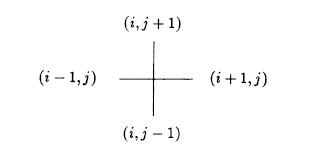
Representação dos vizinhos mais próximos do spin de índices $(i,j)$[3].

Agora, sendo a *magnetização* de uma configuração $\xi$ na rede quadrada dada por$^{[3]}$
\begin{align}
    M_\xi = \sum_{\alpha=1}^{L^2} s_\alpha,
\end{align}
e a magnetização por spin de uma configuração dada por 
\begin{align}
    m_\xi = M_\xi L^2,
\end{align}
segue que nossa magnetização média sobre todas as configurações representativas do nosso sistema de $N = L^2$ spins será dada por
\begin{align}
        \boxed{m =\dfrac{1}{N}M }, \ (2)
\end{align}
onde $M = \sum_{\xi=1}^N m_\xi$ é a *magnetização total*.
<br>
Da equação acima podemos encontrar ainda nossa *susceptibilidade magnética* como sendo$^{[2]}$
\begin{align}
    \boxed{\chi = \dfrac{1}{L^2 k_B T}(\left<M^2\right> - \left<M\right>^2)
         = \dfrac{\beta}{L^2}(\left<M^2\right> - \left<M\right>^2)}, \ \beta = 1/(k_B T). \ (3)
\end{align}

Por fim, temos ainda que nossa capacidade térmica vale$^{[2]}$
\begin{align}
    \boxed{C = \dfrac{1}{L^2T^2}(\left<E^2\right>-\left<E\right>^2) 
    = \dfrac{\beta}{L^2T}(\left<E^2\right>-\left<E\right>^2)}. \ (4)
\end{align}

### (2.4) Algoritmo de Metropolis aplicado ao modelo de Ising $2D$

Vamos aplicar o método de Monte Carlo via algoritmo de Metropolis usando a linguagem de programação Python. Para tal, vamos considerar também que a temperatura crítica em unidades de $J/k_B$, $T_c$, no modelo de Ising 2D, é dada por$^{[2]}$
\begin{align}
    T_c = \dfrac{2}{\ln(1+\sqrt{2})} \approx 2,269.
\end{align}
Disso segue que a *magnetização analítica* por spin para temperaturas não críticas $T_c$, que usaremos para comparar com os resultados numéricos obtidos, vale$^{[2]}$
\begin{align}
   \boxed{ m(T) = (1-[\sin(2\beta J)]^{-4})^{1/8}, \ T < T_c}, \ (5)
\end{align}
e nula caso contrário.

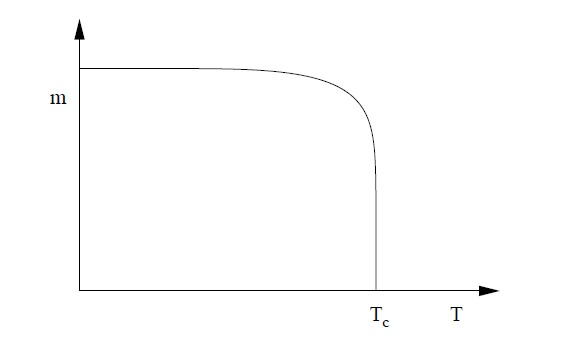
Dependência da magnetização analítica espontânea com a temperatura no caso do modelo de Ising 2D [2].

Vamos usar também como base para nossa comparação a *energia analítica* do sistema em questão, dada por$^{[2]}$
\begin{align}
    \boxed{E(T) = -2 N J \tanh(2\beta J) - 
    N J \dfrac{\sinh^2(2\beta J)-1}{\sinh(2\beta J)\cosh(2\beta J)}\left(\dfrac{2}{\pi}K_1(\kappa)-1\right)}, \ (6)
\end{align}
e a *capacidade térmica analítica*, que é dada por$^{[2]}$
\begin{align}
    \boxed{C(T) = N k_B \dfrac{4}{\pi}
    (\beta J \coth(2\beta J))^2
    \left(K_1(\kappa)-E_1(\kappa)-(1 - \tanh^2(2\beta J))\left(\dfrac{\pi}{2} + (2\tanh^2(2\beta J)-1)K_1(\kappa)\right)\right)}, \ (7)
\end{align}
onde
\begin{align}
    K_1(\kappa) = \int_0^{\pi/2} \dfrac{d\phi}{\sqrt{1-\kappa^2\sin^2\phi}} \text{ e }
    E_1(\kappa) = \int_0^{\pi/2}d\phi\sqrt{1-\kappa^2\sin^2\phi}.
\end{align}

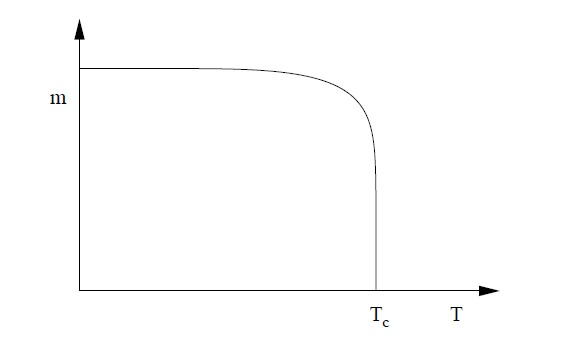

Dependência da magnetização espontânea com a temperatura no caso do modelo de Ising 2D.

#### (2.4.1) Algoritmo de Metropolis em Python

In [2]:
# Bibliotecas usadas
import numpy as np
import math
from mpmath import *
import random
import matplotlib.pyplot as plt

In [40]:
# Definindo nossa rede LxL com uma configuração aleatória inicial de spins
def configuracao_inicial(L):
  '''
  Esta função retorna um matriz LxL que representa os spins na rede, de acordo
  com o exemplo da figura do modelo de Ising 2D na rede quadrada.
  L = tamanho da rede quadrada
  '''
  estado_inicial = 2 * np.random.randint(2, size=(L,L)) - 1
  return estado_inicial

In [41]:
# Calculando a energia do sistema
def energiaTotal(configuracao_inicial, L):
  '''
  Esta função retorna a energia total do sistema dada a 
  configuracao_inicial = matriz LxL dos spins na rede
  L = tamanho da rede
  '''
  energia_total = 0
  for i in range(len(configuracao_inicial)):
    for j in range(len(configuracao_inicial)):
      # Spin na posição (i,j) da rede
      spin_ij = configuracao_inicial[i,j] 
      # Vizinhos mais próximos do spin_ij
      neighbor_ij = configuracao_inicial[(i+1)%L, j] + configuracao_inicial[i, (j+1)%L] + configuracao_inicial[(i-1)%L, j] + configuracao_inicial[i, (j-1)%L]
      # Energia total tomada após varrermos toda a nossa rede
      energia_total += -neighbor_ij * spin_ij
  return energia_total/4

In [42]:
# Cálculo da magnetização 
def magnetizacaoTotalN(configuracao_inicial):
  '''
  Esta função retorna a magnetização total na direção z para um sistema com N spins
  dada a 
  configuração_inicial = matriz da rede de spins LxL do momento analisado
  '''
  magnetizacao_total = np.sum(configuracao_inicial)
  return magnetizacao_total

In [43]:
# Método de Monte Carlo utilizando o Algoritmo de Metropolis
def monte_carlo_metropolis_algoritmo(configuracao_inicial, beta):
  '''
  Entradas da função: config_inicial = matriz de spins na rede, beta = 1/kT, sendo k = const. Boltzmann e T = temperatura.
  Esta função executa o Algoritmo de Metropolis que é descrito pelos passos:
    1. Escolhemos um estado de configuração inicial do sistema
    2. Escolhemos um lado i
    3. Calculamos a variação de energia dE que diz se o spin de lado i trocou ou
      não de lado
    4. Geramos um número aleatório r entre 0 e 1
    5. Se r < exp(-dE/kT) ou dE < 0 então aceitamos a mudança do spin
    6. Escolhemos um novo spin e repetimos o processo 3 em diante
  '''
  L = len(configuracao_inicial)
  for i in range(L):
    for j in range(L):
      a = np.random.randint(0,L)
      b = np.random.randint(0,L)
      # Spin da rede na posição (a,b)
      spin_ab = configuracao_inicial[a,b]
      # Vizinhos mais próximos do spin_ab
      neighbor_ab = configuracao_inicial[(a+1)%L, b] + configuracao_inicial[a, (b+1)%L] + configuracao_inicial[(a-1)%L, b] + configuracao_inicial[a, (b-1)%L]
      dE = 2 * spin_ab * neighbor_ab
      if dE < 0:
        spin_ab *= -1
      elif random.random() < np.exp(-dE * beta):
        spin_ab *= -1
      configuracao_inicial[a,b] = spin_ab
  return configuracao_inicial

In [18]:
def calculo_propriedades_termodinamicas(configuracao_inicial, L, quant_passos, erro_assoc):
  ''' 
  Esta função retorna a seguinte tupla:
  (T, Energias, Magnetizacoes,CapacidadeTermicas, Susceptibilidades, deltaEnergias,
  deltaMagnetizacoes, deltaCapacidadeTermicas, deltaSusceptibilidades)

  Aqui temos as seguintes entradas para a nossa função 
        configuracao_inicial = matriz de configuração inicial dos spins na rede LxL
        L = tamanho da rede quadrada
        quant_passos = número de passos para atingir o equilíbrio do sistema (ou, número de vezes que rodamos o MCS)
        erro_assoc = erro associado a cada medida

  '''
        
  # Iniciando o cálculo das propriedades Termodinâmicas de interesse
    
  # Número de pontos de Tempartura analisados
  nT = 100
  # Número de passos no Método de Monte Carlo
  quant_passosMC = 150
  # O número quant_passosMC do Método de Monte Carlo para equilíbrio deve ser pelo menos igual ao número de quant_passos para equilíbrio 
    
  # Temperatura crítica 
  T_c = 2/math.log(1 + math.sqrt(2))
        
    

  # INICIALIZANDO AS VARIÁVEIS
    # Intervalo de temperatura analisado
  T = np.linspace(1., 7., nT); 
    # Propriedades termodinâmicas de interesse
  E, M, = np.zeros(nT), np.zeros(nT)
    # Variações das propriedades termodinâmicas de interesse
  delta_E,delta_M, delta_C, delta_X = np.zeros(nT), np.zeros(nT), np.zeros(nT), np.zeros(nT)
    # Lista de valores que teremos como retorno das variações das propriedades termodinâmicas
  Energias = []
  Magnetizacoes = []
  CapacidadeTermicas = []
  Susceptibilidades = []
  deltaEnergias = []
  deltaMagnetizacoes = []
  deltaCapacidadeTermicas = []
  deltaSusceptibilidades = []
    
  for t in range(nT):
      # Iniciando a energia total e a magnetização via fator beta
      beta = 1./T[t]
      Temp = T[t]
      # Repetindo o Método de Monte Carlo até o sistema atingir o equilíbrio
      for i in range(quant_passos):
          monte_carlo_metropolis_algoritmo(configuracao_inicial, beta)
      # Lista das propriedades
      Ez = []
      Cz = []
      Mz = [] 
      Xz = [] 

      for j in range(erro_assoc):
          E = 0
          E_quadrado = 0
          M = 0
          M_quadrado = 0
          for i in range(quant_passosMC):
              monte_carlo_metropolis_algoritmo(configuracao_inicial, beta) 
              # Cálculo da energia no instante da aplicação do Método de Monte Carlo
              energia = energiaTotal(configuracao_inicial,L)
              # Cálculo da magnetização no instante da aplicação do Método de Monte Carlo
              mag = abs(magnetizacaoTotalN(configuracao_inicial))

              # Atualizando os valores da energia e da magnetização a cada instante de tempo em que rodamos a aplicação

              E += energia
              E_quadrado += energia**2
              M += mag
              M_quadrado += mag**2


          # Valores médios de interesse
            # Dividimos pelo número de passos do processo anterior para obtermos o valor correto

          E_media = E / quant_passosMC
          E_quadrado_media = E_quadrado / quant_passosMC
          M_media = M / quant_passosMC
          M_quadrado_media = M_quadrado / quant_passosMC

          # Cálculo das propriedades termodinâmicas de interesse

          Energia = E_media / (L**2)
          CapacidadeTermica = beta * (E_quadrado_media - E_media ** 2) / (Temp * (L ** 2))
          Magnetizacao = M_media / L ** 2
          Susceptibilidade = beta * (M_quadrado_media - M_media ** 2) / (L ** 2)

          Ez.append(Energia) 
          Cz.append(CapacidadeTermica)
          Mz.append(Magnetizacao)
          Xz.append(Susceptibilidade)

      # Energia total final do sistema tirada a partir da média total do sistema
      EnergiaReal = np.mean(Ez)
      Energias.append(EnergiaReal)
      deltaEnergia = np.std(Ez)
      deltaEnergias.append(float(deltaEnergia))

      # Magnetização total final do sistema tirada a partir da média total do sistema
      MagnetizacaoReal = np.mean(Mz)
      Magnetizacoes.append(MagnetizacaoReal)
      deltaMagnetizacao = np.std(Mz)
      deltaMagnetizacoes.append(deltaMagnetizacao)

      # Capacidade Térmica total final do sistema tirada a partir da média total do sistema
      CapacidadeTermicaReal = np.mean(Cz)
      CapacidadeTermicas.append(CapacidadeTermicaReal)
      deltaCapacidadeTermica = np.std(Cz)
      deltaCapacidadeTermicas.append(deltaCapacidadeTermica)

      # Susceptibilidade total final do sistema tirada a partir da média total do sistema
      SusceptibilidadeReal = np.mean(Xz)      
      Susceptibilidades.append(SusceptibilidadeReal)
      deltaSusceptibilidade = np.std(Xz)  
      deltaSusceptibilidades.append(deltaSusceptibilidade)
        
            
      
        
  return (T, Energias, Magnetizacoes,CapacidadeTermicas, Susceptibilidades, deltaEnergias, deltaMagnetizacoes, deltaCapacidadeTermicas, deltaSusceptibilidades)

In [44]:
# Magnetizacao analitica via solucao de Onsager
def Magnetizacao_analitica():
  '''
  Esta função tem como retorno a Magnetização analítica 
  dada na solução de Osanger do Modelo de Ising 2D
  '''
  # Pontos de temperatura
  nT = 100
  T = np.linspace(1., 7., nT)
  # Temperatura crítica 
  T_c = 2/math.log(1 + math.sqrt(2))
  # Iniciando as variáveis
  Magnetizacao_analitica = np.zeros(nT)
  for t in range(nT):
    beta = 1/T[t]
    # Magnetização obtida de forma analítica
    if T[t] >= T_c:
        Magnetizacao_analitica[t] = 0
    else:
        Magnetizacao_analitica[t] = pow(1 - pow(np.sinh(2*beta), -4),1/8)
          
  return (T, Magnetizacao_analitica)

In [45]:
# Magnetização Analítica
T, Magnetizacao_analitica = Magnetizacao_analitica()

In [46]:
# Energia analítica em unidades de NJ
def energia_analitica():
    #N = L ** 2
    # Pontos de temperatura
    nT = 100
    T = np.linspace(1., 7., nT)
    # Iniciando as variáveis
    energiaAnalitica = np.zeros(nT)
    for t in range(nT):
        kappa = 2 * (np.sinh(2 / T[t])) / ((np.cosh(2 / T[t])) ** 2)
        energiaAnalitica[t] = -2 * np.tanh(2 / T[t]) - ((np.sinh(2 / T[t]) ** 2) - 1) * ((2 * float(ellipk(kappa ** 2)) / np.pi) - 1) / (np.sinh(2 / T[t]) * np.cosh(2 / T[t]))
    return (T, energiaAnalitica)

In [48]:
# Capacidade Térmica analítica em unidades de NJ^2
def capacidadeTermica_analitica():
    # Pontos de temperatura
    nT = 100
    T = np.linspace(1., 7., nT)
    # Iniciando as variáveis
    capacidadeTermicaAnalitica = np.zeros(nT)
    for t in range(nT):
        beta = 1 / T[t]
        kappa = 2 * (np.sinh(2 / T[t])) / ((np.cosh(2 / T[t])) ** 2)
        capacidadeTermicaAnalitica[t] = (beta * (4 / np.pi) / T[t]) * (float(ellipk(kappa ** 2)) - float(ellipe(kappa ** 2)) - (1 - np.tanh(2 / T[t]) ** 2) * ((np.pi / 2) + (2 * np.tanh(2 / T[t]) ** 2 - 1) * float(ellipk(kappa ** 2))))
    return (T, capacidadeTermicaAnalitica)

In [36]:
T, capacidadeTermicaAnalitica = capacidadeTermica_analitica()

##### Método de Monte Carlo tomando a rede quadrada de lado $L=4$

In [27]:
T4, Energias4, Magnetizacoes4, CapacidadeTermicas4, Susceptibilidades4, deltaEnergias4, deltaMagnetizacoes4, deltaCapacidadeTermicas4, deltaSusceptibilidades4 = calculo_propriedades_termodinamicas(configuracao_inicial(4), 4, quant_passos=150, erro_assoc=150)

##### Método de Monte Carlo tomando a reda quadrada de lado $L=8$

In [28]:
T8, Energias8, Magnetizacoes8, CapacidadeTermicas8, Susceptibilidades8, deltaEnergias8, deltaMagnetizacoes8, deltaCapacidadeTermicas8, deltaSusceptibilidades8 = calculo_propriedades_termodinamicas(configuracao_inicial(8), 8, quant_passos=150, erro_assoc=150)

##### Método de Monte Carlo tomando a reda quadrada de lado $L=12$

In [30]:
T12, Energias12, Magnetizacoes12, CapacidadeTermicas12, Susceptibilidades12, deltaEnergias12, deltaMagnetizacoes12, deltaCapacidadeTermicas12, deltaSusceptibilidades12 = calculo_propriedades_termodinamicas(configuracao_inicial(12), 12, quant_passos=150, erro_assoc=150)

##### Método de Monte Carlo tomando a reda quadrada de lado $L=16$

In [51]:
T16, Energias16, Magnetizacoes16, CapacidadeTermicas16, Susceptibilidades16, deltaEnergias16, deltaMagnetizacoes16, deltaCapacidadeTermicas16, deltaSusceptibilidades16 = calculo_propriedades_termodinamicas(configuracao_inicial(16), 16, quant_passos=150, erro_assoc=150)

In [103]:
def epsilon():
    # Intervalo de temperatura
    nT = 100
    T = np.linspace(1., 7., nT)
    # Temperatura critica 
    T_c = 2/math.log(1 + math.sqrt(2))
    conjunto_epsilon = []
    for i_temp, temperatura in enumerate(T):
        if (1 - temperatura / T_c) > 0 and (1 - temperatura / T_c) < 0.1:
            conjunto_epsilon.append((i_temp, temperatura))
    i_temp, temperatura = max(conjunto_epsilon)
    epsilon = (1 - temperatura / T_c)
    return i_temp, temperatura, epsilon

### (2.5) Resultados obtidos dos valores $L=4$, $L=8$, $L=12$ e $L=16$

Após aplicarmos o método de Monte Carlo para as redes de tamanho $L=4$, $L=8$, $L=12$ e $L=16$ via algoritmo presente no Apêndice, com base nas equações $(1)$, $(2)$, $(3)$ e $(4)$, obtivemos os seguintes resultados numéricos, os quais estão descritos juntamente com as soluções analíticas dadas pelas equações $(5)$, $(6)$ e $(7)$.

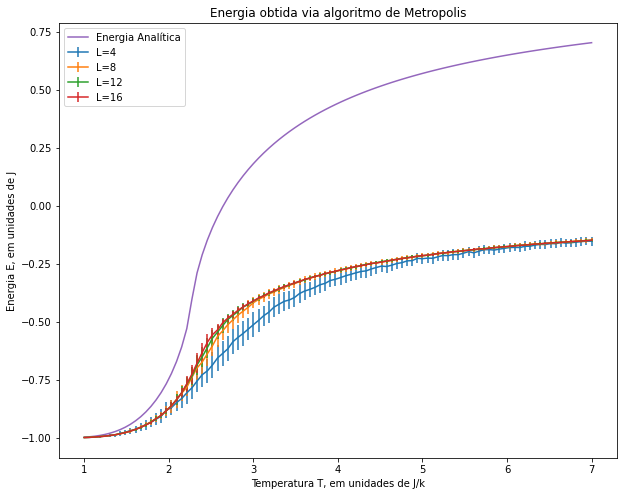

In [60]:
# Energia
fig = plt.figure(figsize=(10,8))
plt.title('Energia obtida via algoritmo de Metropolis')
plt.errorbar(T4, Energias4, yerr=deltaEnergias4, label='L=4')
plt.errorbar(T8, Energias8, yerr=deltaEnergias8, label='L=8')
plt.errorbar(T12, Energias12, yerr=deltaEnergias12, label='L=12')
plt.errorbar(T16, Energias16, yerr=deltaEnergias16, label='L=16')
plt.plot(T, energiaAnalitica + 1, label='Energia Analítica')

plt.xlabel('Temperatura T, em unidades de J/k')
plt.ylabel('Energia E, em unidades de J')
plt.legend()
plt.show()

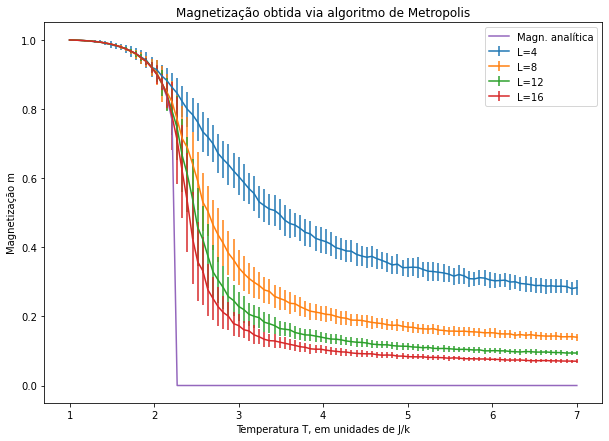

In [62]:
# Magnetização
fig = plt.figure(figsize=(10,7))
plt.title('Magnetização obtida via algoritmo de Metropolis')
plt.errorbar(T4, Magnetizacoes4, yerr=deltaMagnetizacoes4, label='L=4')
plt.errorbar(T8, Magnetizacoes8, yerr=deltaMagnetizacoes8, label='L=8')
plt.errorbar(T12, Magnetizacoes12, yerr=deltaMagnetizacoes12, label='L=12')
plt.errorbar(T16, Magnetizacoes16, yerr=deltaMagnetizacoes16, label='L=16')
plt.plot(T, Magnetizacao_analitica, label='Magn. analítica')

plt.xlabel('Temperatura T, em unidades de J/k')
plt.ylabel('Magnetização m')
plt.legend()
plt.show()

In [95]:
# Magnetização analitica e Magnetizacao numerica proxima de T_c
print('Valores proximos a T_c. Magnetizacao. Analitica: {}.'.format(Magnetizacao_analitica[epsilon()]))
print('M. Numerica para L=4: {}.'.format( Magnetizacoes4[epsilon()]))
print('M. Numerica para L=8: {}.'.format( Magnetizacoes8[epsilon()]))
print('M. Numerica para L=12: {}.'.format( Magnetizacoes12[epsilon()]))
print('M. Numerica para L=16: {}.'.format( Magnetizacoes16[epsilon()]))

Valores proximos a T_c. Magnetizacao. Analitica: 0.7670179122107821.
M. Numerica para L=4: 0.8624222222222223.
M. Numerica para L=8: 0.8202680555555555.
M. Numerica para L=12: 0.7945660493827159.
M. Numerica para L=16: 0.7790749999999999.


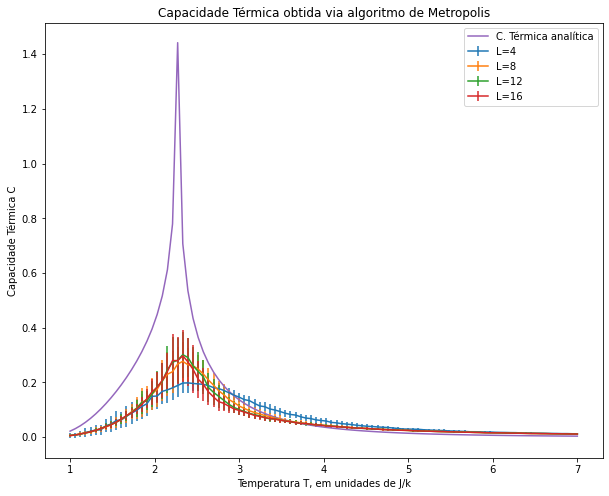

In [55]:
# Capacidade Térmica
fig = plt.figure(figsize=(10,8))
plt.title('Capacidade Térmica obtida via algoritmo de Metropolis')
plt.errorbar(T4, CapacidadeTermicas4, yerr=deltaCapacidadeTermicas4, label='L=4')
plt.errorbar(T8, CapacidadeTermicas8, yerr=deltaCapacidadeTermicas8, label='L=8')
plt.errorbar(T12, CapacidadeTermicas12, yerr=deltaCapacidadeTermicas12, label='L=12')
plt.errorbar(T16, CapacidadeTermicas16, yerr=deltaCapacidadeTermicas16, label='L=16')

plt.plot(T, capacidadeTermicaAnalitica, label='C. Térmica analítica')

plt.xlabel('Temperatura T, em unidades de J/k')
plt.ylabel('Capacidade Térmica C')
plt.legend()
plt.show()

In [96]:
# Capacidade Termica analitica numerica proxima de T_c
print('Valores proximos a T_c. C. Termica. Analitica: {}.'.format(capacidadeTermicaAnalitica[epsilon()]))
print('C. Termica Numerica para L=4: {}.'.format(CapacidadeTermicas4[epsilon()]))
print('C. Termica Numerica para L=8: {}.'.format(CapacidadeTermicas8[epsilon()]))
print('C. Termica Numerica para L=12: {}.'.format(CapacidadeTermicas12[epsilon()]))
print('C. Termica Numerica para L=16: {}.'.format(CapacidadeTermicas16[epsilon()]))

Valores proximos a T_c. C. Termica. Analitica: 0.7794243870995594.
C. Termica Numerica para L=4: 0.18010402314380436.
C. Termica Numerica para L=8: 0.23904867323450313.
C. Termica Numerica para L=12: 0.27392834298701046.
C. Termica Numerica para L=16: 0.27974410779070513.


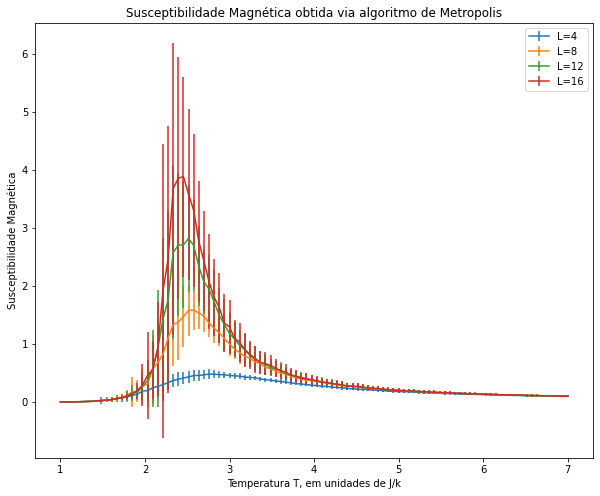

In [56]:
# Susceptibilidade Magnética
fig = plt.figure(figsize=(10,8))
plt.title('Susceptibilidade Magnética obtida via algoritmo de Metropolis')
plt.errorbar(T4, Susceptibilidades4, yerr=deltaSusceptibilidades4, label='L=4')
plt.errorbar(T8, Susceptibilidades8, yerr=deltaSusceptibilidades8, label='L=8')
plt.errorbar(T12, Susceptibilidades12, yerr=deltaSusceptibilidades12, label='L=12')
plt.errorbar(T16, Susceptibilidades16, yerr=deltaSusceptibilidades16, label='L=16')

plt.xlabel('Temperatura T, em unidades de J/k')
plt.ylabel('Susceptibilidade Magnética')
plt.legend()
plt.show()

In [97]:
# Susceptibilidade magnetica numerica proxima de T_c
print('Valores proximos a T_c.')
print('Susceptibilidade Magnetica Numerica para L=4: {}.'.format(Susceptibilidades4[epsilon()]))
print('Susceptibilidade Magnetica Numerica para L=8: {}.'.format(Susceptibilidades8[epsilon()]))
print('Susceptibilidade Magnetica Numerica para L=12: {}.'.format(Susceptibilidades12[epsilon()]))
print('Susceptibilidade Magnetica Numerica para L=16: {}.'.format(Susceptibilidades16[epsilon()]))

Valores proximos a T_c.
Susceptibilidade Magnetica Numerica para L=4: 0.30012520547945215.
Susceptibilidade Magnetica Numerica para L=8: 0.8225805943683406.
Susceptibilidade Magnetica Numerica para L=12: 1.422202471503467.
Susceptibilidade Magnetica Numerica para L=16: 1.9130930525114158.


Graficamente temos que nossa aproximação numérica para as soluções analíticas obtidas por Onsager se aproximam cada vez mais do resultado teórico à medida que aumentamos o número de configurações de equilíbrio, isto é, o valor de $L$. Para verificarmos com mais clareza a acurácia dos resultados numéricos vamos avaliar a ordem de grandeza sobre os *expoentes críticos* para a capacidade térmica, magnetização e susceptibilidade magnética.
<br>
No limite assintótico, isto é, $T \to T_c$, temos que$^{[2]}$
\begin{align}
    \boxed{C(T)\sim \ln|\epsilon|, \ m\sim \epsilon^{1/8}, \text{ e } \chi\sim |\epsilon|^{-7/4}} \ \left(\epsilon = 1 - T/T_c\right). \ (8)
\end{align}

Avaliando os resultados numéricos para $T \to T_c$, presente graficamente nas figuras acima, obtemos a tabela abaixo.

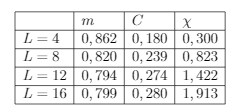
Tabela com os valores das grandezas próximas à temperatura crítica, $T_c$.
<br>
Da tabela acima, considerando as equações para os expoentes numéricos, para cada tamanho de rede, dada por$^{[3]}$
\begin{align}
    m_L\sim\epsilon^{\beta}, \ C_L \sim \epsilon^{-\alpha}  \text{ e } \chi_L\sim\epsilon^{-\gamma},
\end{align}
encontramos os valores dos expoentes médios do método de Monte Carlo (mc) $\beta_{mc}, \gamma_{mc}$ e $\alpha_{mc}$ são:
\begin{align}
    \boxed{\beta_{mc} = 0,054, \ \alpha_{mc} = -0,3878 \text{ e } \gamma_{mc} = -0,027}.
\end{align}
Comparando com os valores analíticos da equação $(8)$, $\beta=0,125$, $\alpha=0$ e $\gamma=1,75$, observamos que numericamente não obtemos valores tão próximos como gostaríamos. Mas, podemos contornar tal situação computando as incertezas nos cálculos anteriores referentes ao método numérico e também aumentando o número de configurações acessíveis ao sistema, isto é, o tamanho da rede.

## (3) Conclusões

Para o trabalho em questão analisamos somente um número pequeno de configurações por conta da limitação computacional, que não permitiu obtermos melhores resultados devido ao tempo de processamento do método.
<br>
Porém, com base nos resultados numéricos obtidos para energia, magnetização, capacidade térmica e susceptibilidade magnética via método de Monte Carlo aplicado ao modelo de Ising $2D$ temos visualmente que quanto maior o número de configurações que tomamos para o nosso sistema, isto é, quanto maior o tamanho da nossa rede (de lado $L$), melhor será a validade do método em questão.
<br>

## Bibliografias

### Bibliotecas usadas

- https://numpy.org
- https://mpmath.org
- https://matplotlib.org

### Livros de referência
[1] Introdução à Física Estatística, Salinas.
<br>
[2] Harvey Gould, Jan Tobochnik - Statistical and Thermal Physics With Computer Applications-Princeton University Press (2010).
<br>
[3] (Graduate Texts in Physics) Kurt Binder, Dieter W. Heermann - Monte Carlo Simulation in Statistical Physics An Introduction-Springer International Publishing (2019)